In [57]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
import tensorflow as tf

from keras.utils import to_categorical

In [54]:
from sklearn.datasets import fetch_lfw_people, load_breast_cancer, load_iris
people = fetch_lfw_people(min_faces_per_person=70)

In [9]:
from sklearn.datasets import load_boston
import pandas as pd

In [11]:
data = load_boston()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [17]:
model = Sequential()
X_train.shape # shows how many features

(379, 13)

In [22]:
model.add(Dense(13, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1))

In [23]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [28]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20)

Train on 379 samples, validate on 127 samples
Epoch 1/20
379/379 [==============================] - 0s 48us/step - loss: 17.6612 - val_loss: 24.7176
Epoch 2/20
379/379 [==============================] - 0s 45us/step - loss: 17.5652 - val_loss: 24.6105
Epoch 3/20
379/379 [==============================] - 0s 48us/step - loss: 17.4400 - val_loss: 24.6698
Epoch 4/20
379/379 [==============================] - 0s 45us/step - loss: 17.2978 - val_loss: 24.4757
Epoch 5/20
379/379 [==============================] - 0s 48us/step - loss: 17.1658 - val_loss: 24.2497
Epoch 6/20
379/379 [==============================] - 0s 42us/step - loss: 17.0609 - val_loss: 24.2217
Epoch 7/20
379/379 [==============================] - 0s 42us/step - loss: 16.9284 - val_loss: 24.0070
Epoch 8/20
379/379 [==============================] - 0s 42us/step - loss: 16.8308 - val_loss: 23.8259
Epoch 9/20
379/379 [==============================] - 0s 45us/step - loss: 16.7377 - val_loss: 23.7528
Epoch 10/20
379/379 [======

# Binary classfication

In [32]:
data = load_breast_cancer()
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0,

In [33]:
print(data.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [34]:
target = data.target * -1 + 1

In [35]:
X_train, X_test, y_train, y_test = train_test_split(data.data, target)
ss = StandardScaler()

In [37]:
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

In [45]:
model = Sequential()
model.add(Dense(X_train.shape[1], input_dim=X_train.shape[1], activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [47]:
model.fit(X_train,y_train, validation_data=(X_test, y_test), epochs=10)

Train on 426 samples, validate on 143 samples
Epoch 1/10
426/426 [==============================] - 1s 1ms/step - loss: 0.8639 - acc: 0.4319 - val_loss: 0.7304 - val_acc: 0.5105
Epoch 2/10
426/426 [==============================] - 0s 68us/step - loss: 0.5658 - acc: 0.6690 - val_loss: 0.5040 - val_acc: 0.7273
Epoch 3/10
426/426 [==============================] - 0s 56us/step - loss: 0.3980 - acc: 0.8474 - val_loss: 0.3669 - val_acc: 0.8741
Epoch 4/10
426/426 [==============================] - 0s 49us/step - loss: 0.3015 - acc: 0.9225 - val_loss: 0.2864 - val_acc: 0.9161
Epoch 5/10
426/426 [==============================] - 0s 61us/step - loss: 0.2448 - acc: 0.9437 - val_loss: 0.2365 - val_acc: 0.9301
Epoch 6/10
426/426 [==============================] - 0s 56us/step - loss: 0.2084 - acc: 0.9460 - val_loss: 0.2034 - val_acc: 0.9441
Epoch 7/10
426/426 [==============================] - 0s 47us/step - loss: 0.1824 - acc: 0.9460 - val_loss: 0.1809 - val_acc: 0.9510
Epoch 8/10
426/426 [====

In [48]:
model.predict(X_test)

array([[ 0.02562111],
       [ 0.99456537],
       [ 0.99950421],
       [ 0.58101761],
       [ 0.12250246],
       [ 0.07875784],
       [ 0.34652734],
       [ 0.99992824],
       [ 0.99377811],
       [ 0.00602841],
       [ 0.99233961],
       [ 0.03063892],
       [ 0.10232757],
       [ 0.2472126 ],
       [ 0.08395835],
       [ 0.06561336],
       [ 0.99999332],
       [ 0.99940383],
       [ 0.02966477],
       [ 0.09148387],
       [ 0.93057573],
       [ 0.02453707],
       [ 0.11719768],
       [ 0.08402832],
       [ 0.0878014 ],
       [ 0.99969876],
       [ 0.98739803],
       [ 1.        ],
       [ 0.13559192],
       [ 0.05173052],
       [ 0.99987435],
       [ 0.06505246],
       [ 0.03045276],
       [ 0.8742128 ],
       [ 0.0149174 ],
       [ 0.15162793],
       [ 0.00514573],
       [ 0.07250049],
       [ 0.99993587],
       [ 0.06274789],
       [ 0.05601579],
       [ 0.06322663],
       [ 0.14306934],
       [ 0.04808632],
       [ 0.98365849],
       [ 0

In [51]:
pred = model.predict_classes(X_test)
pred[:, 0]

143/143 [==============================] - 0s 42us/step


array([0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0])

# Iris dataset

In [55]:
data = load_iris()

In [56]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)

In [58]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [59]:
y_train

array([[ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  1.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 1.,  0.

In [60]:
ss = StandardScaler()
X_train= ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [64]:
model = Sequential()
model.add(Dropout(.5, input_shape=(X_train.shape[1],)))
model.add(Dense(10, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(5, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=70)

Train on 112 samples, validate on 38 samples
Epoch 1/20
112/112 [==============================] - 0s 4ms/step - loss: 1.3104 - acc: 0.3571 - val_loss: 1.2300 - val_acc: 0.2632
Epoch 2/20
112/112 [==============================] - 0s 63us/step - loss: 1.4100 - acc: 0.2857 - val_loss: 1.2194 - val_acc: 0.2632
Epoch 3/20
112/112 [==============================] - 0s 63us/step - loss: 1.3886 - acc: 0.3125 - val_loss: 1.2093 - val_acc: 0.2632
Epoch 4/20
112/112 [==============================] - 0s 54us/step - loss: 1.2924 - acc: 0.2589 - val_loss: 1.1998 - val_acc: 0.2632
Epoch 5/20
112/112 [==============================] - 0s 54us/step - loss: 1.3369 - acc: 0.3393 - val_loss: 1.1907 - val_acc: 0.2895
Epoch 6/20
112/112 [==============================] - 0s 54us/step - loss: 1.2961 - acc: 0.3393 - val_loss: 1.1814 - val_acc: 0.2895
Epoch 7/20
112/112 [==============================] - 0s 63us/step - loss: 1.2119 - acc: 0.3482 - val_loss: 1.1721 - val_acc: 0.2895
Epoch 8/20
112/112 [=====

## Image Recognition

In [65]:
data = fetch_lfw_people(min_faces_per_person=70)

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline

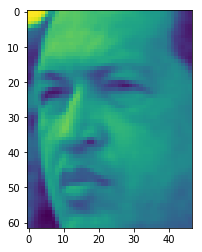

In [69]:
plt.imshow(data.images[0])

In [70]:
data.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'],
      dtype='<U17')

In [71]:
data.target

array([5, 6, 3, ..., 5, 3, 5], dtype=int64)

In [72]:
len(data.target)

1288

In [73]:
y = to_categorical(data.target)

In [74]:
X_train, X_test, y_train, y_test = train_test_split(data.data, y)

In [75]:
X_train[0,:]

array([  77.33333588,   80.        ,  112.33333588, ...,   43.33333206,
         41.33333206,   52.        ], dtype=float32)

In [76]:
X_train = X_train / 255.
X_test = X_test / 255

In [77]:
model = Sequential()
model.add(Dense(X_train.shape[1], input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(y.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=100)

Train on 966 samples, validate on 322 samples
Epoch 1/5
966/966 [==============================] - 2s 2ms/step - loss: 8.6271 - acc: 0.3799 - val_loss: 10.0112 - val_acc: 0.3789
Epoch 2/5
966/966 [==============================] - 2s 2ms/step - loss: 9.3105 - acc: 0.4224 - val_loss: 10.0112 - val_acc: 0.3789
Epoch 3/5
966/966 [==============================] - 2s 2ms/step - loss: 9.3105 - acc: 0.4224 - val_loss: 10.0112 - val_acc: 0.3789
Epoch 4/5
966/966 [==============================] - 2s 2ms/step - loss: 9.3105 - acc: 0.4224 - val_loss: 10.0112 - val_acc: 0.3789
Epoch 5/5
966/966 [==============================] - 2s 2ms/step - loss: 9.3105 - acc: 0.4224 - val_loss: 10.0112 - val_acc: 0.3789
